# 基于文本挖掘的食品添加剂知识图谱构建和应用研究

TODO: 根据FoodSafetySentences.xlsx增加词汇

## 背景/简介

食品添加剂: 概念,滥用,超量使用 > 食品安全问题  [1,2,3]   
食品质量安全是“健康中国”和“质量强国”国家战略的重要组成部分，事关民生、民心，是各级政府的工作重心。食品添加剂的非法使用、滥用和过量使用是食品安全把控的关键环节，也是有关部门抽检的重要内容。
本论文焦食品添加剂，基于大数据实现对食品添加剂的知识图谱挖掘和时空演化分析。

## 方法

### 数据来源

数据来源包括：1）政府开发数据平台中的“食品监督抽查不合格信息”公开数据集（https://data.zjzwfw.gov.cn/jdop_front/channal/data_public.do, 代码cata_4370, 需更新）。从中可以提取各类被抽检食品和违规添加物的关联及频次强度。

2）与食品质量安全相关的网络文本，包括新闻报道、消费者舆情、政府通报。从中挖掘违规添加物的时空演化特征，同时可以不断更新知识图谱中食品实体与违规添加物的关联强度。

### 知识图谱构建方法

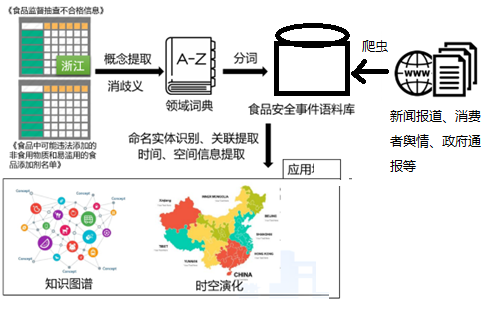

## 结果

### 语料库

食品添加主题的语料库,共5,730条记录 

http://spacs.brahma.pub/text/  (demo, demo)

### 知识图谱

提取到了xxx 概念/关联  

http://spacs.brahma.pub/association/

### 应用

知识图谱的交互式可视化

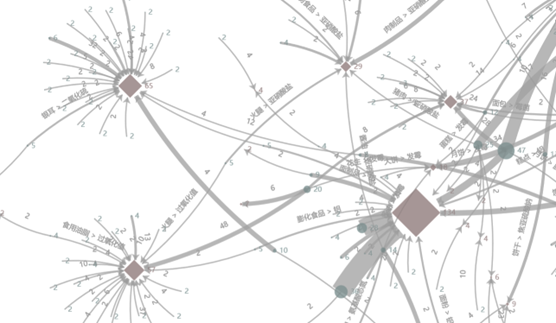

通过文本挖掘技术，从互联网各类文本中提取各种食品类型和相应化学物质的关联强度/支持度，形成食品实体和化学实体的知识图谱。进一步借助交互式可视化技术，用户可以直观了解特定食品和有害化学物质的关联强度/曝光频率。


时空演化可视化

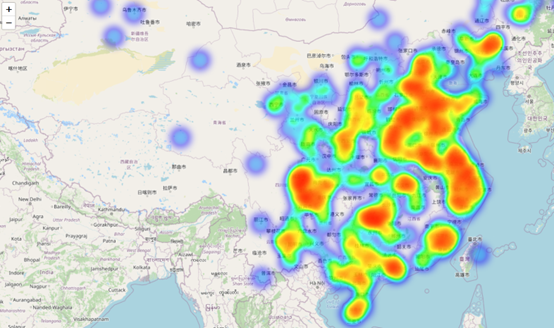

从新闻报道、网络舆情等文本数据中实时提取食品安全事件的时间和地理信息，为特定的食品安全事件渲染时空演化过程。便于用户掌握重大事件的起源、发展和消亡，以及不同食品的区域性和季节性风险特征。


# 讨论和展望

为普通公众，将为用户提供以下功能：1）食品添加剂百科。提供每一种添加剂的化学信息、毒理信息、易感食品、鉴别方法。2）知识图谱。通过关联规则学习和文本挖掘技术，获取各种食品类型和相应添加剂的关联强度/支持度，形成食品实体和化学添加剂实体的知识图谱。通过交互式可视化技术，用户可以了解感兴趣食品易滥用的添加剂种类和风险程度。3）食品添加剂安全事件的时空演化。通过实时挖掘食品安全事件，提取食品、化学添加剂、时间和空间等信息，实现时空可视化，便于用户掌握食品添加剂事件的区域性和季节性特征。

后台不断更新

讨论1\2\3

# 1. 字典构建

重点采集食品及添加剂两类实体，构建语义关联。

## 1.1 构建数据库表(ignore)
```
CREATE TABLE [AssociationSet] (
  [Id] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL
, [Code1] text NULL
, [Code2] text NULL
, [Entity1] text NULL
, [Entity2] text NULL
, [Name] text NULL
, [Code] text NULL
, [CodingSystem] text NULL
, [Strength] text NULL
, [Description] text NULL
, [Metadata] text NULL
, [Image] text NULL
, [Url] text NULL
);
```

## 1.2 导入常见的非法添加和易滥用的食品添加剂 "Food_Additives.xls"

全国打击违法添加非食用物质和滥用食品添加剂专项整治领导小组自2008年以来陆续发布了五批《食品中可能违法添加的非食用物质和易滥用的食品添加剂名单》。卫生部将五批名单汇总发布。

`/Association/Seed`

## 1.3 导入浙江省政府公开数据集(data.zjzwfw.gov.cn) "cata_4370.xls"及"cata_4370_history.xls"

首先由`Dictionary Construction.ipynb`提取到json (格式`[食品, 添加剂, 频次/强度]`)
```
[['鸡蛋布丁', '山梨酸', 2],
 ['青菜', '毒死蜱', 22],
 ['鲁花花生（奶香味）', '霉菌', 2],
 ['（白酒）四粮液', '甜蜜素', 10],
 ['散装鲜活鳊鱼', '恩诺沙星', 6],
 ['红糖馒头006', '甜蜜素', 4],
 ['红糖馒头006', '糖精钠', 4],
 ...
```
然后将json导入数据集，`/Association/Seed1`

## 1.4 手工录入

通过`/Association/`手工录入新增或修改字典项

# 2. 语料库构建

## 2.1 网络爬虫

/Web Crawler.ipynb`  

中国食品安全网 - 曝光专栏, http://www.cfsn.cn/news/, 访问时间：2018年5月，导出文件：20180505104507.h5  5.2MB  
中国食品安全网 - 专家解读专栏，http://www.cfsn.cn/zhuanti/， 访问时间：2018年5月，导出文件：20180505174019.h5  224KB    
食安中国，http://www.cnfoodsafety.com/， 访问时间：2018年5月，导出文件：20180504234042.h5 257MB  

将多个h5文件合并为一个`FoodSafetyAriticles2018.h5` （326MB）  
压缩为zip后体积为38MB

------------

2023年进行了第二次爬虫，

中国食品安全网 - 抽检通告，https://www.cfsn.cn/front/web/site.bwnews?bwid=1&bwtypeid=0 访问时间：2023年2月, 20230216215008.h5 123MB  
食安网 - 食品安全专栏，http://www.cnfoodsafety.com/news/spaq/ 访问时间：2023年2月, 20230216220818.h5 614MB  
食安网 - 曝光台专栏，http://www.cnfoodsafety.com/news/bgt/ 访问时间：2023年2月, 20230216230228.h5 548MB   

以上三项加上`FoodSafetyAriticles2018.h5` （326MB），过滤掉重复项，最终整合得到FoodSafetyAriticles2023.h5（896MB），压缩后99MB

# 3. 加载语料库

Load hdf5 data in Zip

In [1]:
import zipfile
import io
import os.path
import pandas as pd

with zipfile.ZipFile('Corpse2023.zip', 'r') as z:
    for filename in z.namelist(): 
        
        # 解压h5文件
        if (os.path.isfile(filename) == False):
            z.extract(filename)
        
        # 加载h5文件
        with pd.HDFStore(filename,  mode='r') as newstore:
            df = newstore.select('df')
z.close()

C:\Users\eleve\anaconda3\lib\site-packages\tables\leaf.py:402: PerformanceWarning: The Leaf ``/df/_i_table/content/sorted`` is exceeding the maximum recommended rowsize (104857600 bytes);
be ready to see PyTables asking for *lots* of memory and possibly slow
I/O.  You may want to reduce the rowsize by trimming the value of
dimensions that are orthogonal (and preferably close) to the *main*
dimension of this leave.  Alternatively, in case you have specified a
very small/large chunksize, you may want to increase/decrease it.
  warnings.warn("""\


In [2]:
import pandas as pd

with pd.HDFStore('FoodSafetyAriticles2023.h5',  mode='r') as newstore:
    df = newstore.select('df')

print(len(df))
df.head()

C:\Users\eleve\anaconda3\lib\site-packages\tables\leaf.py:402: PerformanceWarning: The Leaf ``/df/_i_table/content/sorted`` is exceeding the maximum recommended rowsize (104857600 bytes);
be ready to see PyTables asking for *lots* of memory and possibly slow
I/O.  You may want to reduce the rowsize by trimming the value of
dimensions that are orthogonal (and preferably close) to the *main*
dimension of this leave.  Alternatively, in case you have specified a
very small/large chunksize, you may want to increase/decrease it.
  warnings.warn("""\


13698


,label,src,url,date,title,content
0,食品安全,中国食品安全网 - 抽检通告,https://www.cfsn.cn/front/web/site.bwnewshow?b...,2023-01-03,市场监管总局发布12批次食品抽检不合格情况通告,摘要：近日，国家市场监督管理总局公布12批次食品不合格情况的通告。主要涉及非食用物质问题、微...
1,食品安全,中国食品安全网 - 抽检通告,https://www.cfsn.cn/front/web/site.bwnewshow?b...,2022-12-19,市场监管总局关于11批次食品不合格情况的通告【2022】,摘要：近日，国家市场监督管理总局公布11批次食品不合格情况的通告。主要涉及生物毒素、食品添加...
2,食品安全,中国食品安全网 - 抽检通告,https://www.cfsn.cn/front/web/site.bwnewshow?b...,2022-11-21,市场监管总局关于11批次食品不合格情况的通告【2022】,摘要：近日，国家市场监督管理总局公布11批次食品不合格情况的通告。主要涉及生物毒素、微生物污...
3,食品安全,中国食品安全网 - 抽检通告,https://www.cfsn.cn/front/web/site.bwnewshow?b...,2022-08-22,市场监管总局通告13批次食品不合格,摘要：近日，国家市场监督管理总局公布13批次食品不合格情况的通告。主要涉及微生物污染、农药残...
4,食品安全,中国食品安全网 - 抽检通告,https://www.cfsn.cn/front/web/site.bwnewshow?b...,2022-08-01,市场监管总局关于10批次食品不合格情况的通告【2022】,摘要：近日，国家市场监督管理总局公布10批次食品不合格情况的通告。主要涉及微生物污染、食品添...


Text(0.5, 0, 'theme')

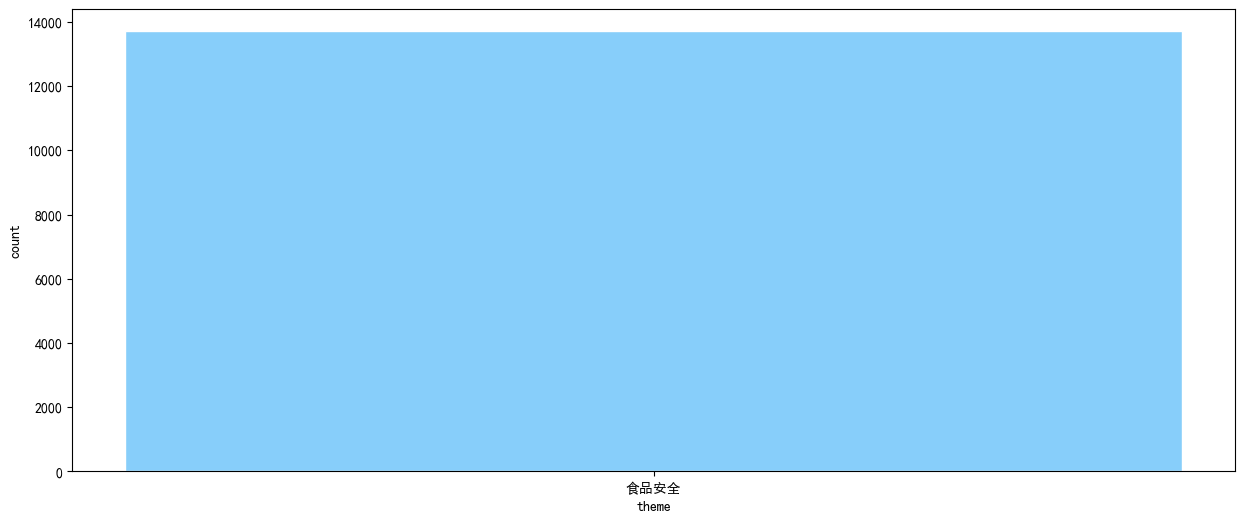

In [3]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,6))

plt.rcParams['font.sans-serif']=['SimHei']

df_grps = df.groupby(['label'])['label'].count()
X = list(df_grps.index)
Y = list(df_grps)

plt.bar(X, Y,width = 0.35,facecolor = 'lightskyblue',edgecolor = 'white')
plt.ylabel('count')
plt.xlabel('theme')

In [4]:
import pandas as pd

with pd.ExcelWriter('FoodSafetyAriticles.xlsx', engine='xlsxwriter') as writer:    
    df.to_excel(writer, sheet_name='202302', index=False)

导入数据库 `/Text/Seed`

筛选“食品安全”相关的文本

In [5]:
df_foodsafety = df[df['label'] == '食品安全']
articles = df_foodsafety['content'].values
titles = df_foodsafety['title'].values
df_foodsafety.head()

,label,src,url,date,title,content
0,食品安全,中国食品安全网 - 抽检通告,https://www.cfsn.cn/front/web/site.bwnewshow?b...,2023-01-03,市场监管总局发布12批次食品抽检不合格情况通告,摘要：近日，国家市场监督管理总局公布12批次食品不合格情况的通告。主要涉及非食用物质问题、微...
1,食品安全,中国食品安全网 - 抽检通告,https://www.cfsn.cn/front/web/site.bwnewshow?b...,2022-12-19,市场监管总局关于11批次食品不合格情况的通告【2022】,摘要：近日，国家市场监督管理总局公布11批次食品不合格情况的通告。主要涉及生物毒素、食品添加...
2,食品安全,中国食品安全网 - 抽检通告,https://www.cfsn.cn/front/web/site.bwnewshow?b...,2022-11-21,市场监管总局关于11批次食品不合格情况的通告【2022】,摘要：近日，国家市场监督管理总局公布11批次食品不合格情况的通告。主要涉及生物毒素、微生物污...
3,食品安全,中国食品安全网 - 抽检通告,https://www.cfsn.cn/front/web/site.bwnewshow?b...,2022-08-22,市场监管总局通告13批次食品不合格,摘要：近日，国家市场监督管理总局公布13批次食品不合格情况的通告。主要涉及微生物污染、农药残...
4,食品安全,中国食品安全网 - 抽检通告,https://www.cfsn.cn/front/web/site.bwnewshow?b...,2022-08-01,市场监管总局关于10批次食品不合格情况的通告【2022】,摘要：近日，国家市场监督管理总局公布10批次食品不合格情况的通告。主要涉及微生物污染、食品添...


# 时间信息

In [6]:
dates = df_foodsafety['date'].values

# 地理信息提取

https://github.com/DQinYuan/chinese_province_city_area_mapper

In [7]:
location_str = list(df_foodsafety['content'].values)
import cpca
geos = cpca.transform(location_str)
geos

,省,市,区,地址,adcode
0,北京市,None,None,京东叁佰陆拾度电子商务有限公司）在京东商城（网店）销售的、标称上海裕田农业科技有限公司生产的...,110000
1,北京市,None,None,、河北、山西、江苏、浙江、安徽、福建、江西、山东、湖北、重庆、四川、陕西、甘肃等省级市场监管...,110000
2,安徽省,滁州市,来安县,刘百彦餐饮店加工自制的油条，其中铝的残留量（干样品，以Al计）不符合食品安全国家标准规定。\...,341122
3,福建省,龙岩市,上杭县,兴明桶装水店销售的、标称福建省上杭县嘉益太空水厂生产的饮用纯净水，其中铜绿假单胞菌菌落数不符...,350823
4,河北省,保定市,None,定州市华北蜂业有限公司生产的土蜂蜜，其中果糖和葡萄糖含量不符合食品安全国家标准规定。\n贵州...,130600
...,...,...,...,...,...
13693,None,None,None,None,None
13694,湖南省,长沙市,None,卫生局经请示湖南省卫生厅并咨询省疾控中心专家，临时将肯德基撤出了不合格名单。关键字：,430100
13695,None,None,None,None,None
13696,上海市,None,None,天祥质量技术服务有限公司检测，其塑化剂含量超标，在白酒行业引起了轩然大波。当日股市相关酒板块...,310000


In [8]:
geos.dropna(inplace = False) # True 

,省,市,区,地址,adcode
2,安徽省,滁州市,来安县,刘百彦餐饮店加工自制的油条，其中铝的残留量（干样品，以Al计）不符合食品安全国家标准规定。\...,341122
3,福建省,龙岩市,上杭县,兴明桶装水店销售的、标称福建省上杭县嘉益太空水厂生产的饮用纯净水，其中铜绿假单胞菌菌落数不符...,350823
9,吉林省,通化市,梅河口市,美合春食品有限公司生产的荞麦冷面，其中山梨酸及其钾盐（以山梨酸计）、脱氢乙酸及其钠盐（以脱氢...,220581
12,河北省,石家庄市,新乐市,陈鹏鸡蛋批发店的鸡蛋，其中氟苯尼考、磺胺类（总量）残留量不符合食品安全国家标准规定。检验机构...,130184
13,天津市,市辖区,滨海新区,米立煎饼店加工自制的油条，其中铝的残留量（干样品，以Al计）不符合食品安全国家标准规定。检验...,120116
...,...,...,...,...,...
13660,山东省,临沂市,费县,工商局接到群众举报，称一伙江湖骗子在县影剧院以雇佣药托、现场讲座的方式进行保健品虚假宣传，游...,371325
13663,内蒙古自治区,呼伦贝尔市,陈巴尔虎旗,畜牧局对那些非法收购奶车进行了新一轮的“保护”，已经给予了那些奶车合法的外衣，发放了运输许可...,150725
13664,吉林省,长春市,朝阳区,上辛堡村的餐洁仕消毒餐具公司工作。在餐洁仕消毒餐具公司内，洗碗机旁放有两个长约1米、宽约50...,220104
13670,河南省,新乡市,延津县,、卫辉市、辉县市暗访制售假葡萄酒的情况。\n在延津县西街镇城关村，走进一个挂有“大伟门窗防盗...,410726


In [9]:
from cpca import drawer
#drawer.draw_locations(geos, "geos.html")
drawer.draw_locations(geos[cpca._ADCODE], "geos.html")

from IPython.display import IFrame
IFrame(src='geos.html', width=1600, height=900)

# 4. 加载词典

`.json`来自数据库表`AssociationSet`

In [10]:
import json

arr_food = []
arr_chem = []
dict_link = {}

with open('18654.json', encoding='UTF-8') as json_file:
    data = json.load(json_file)
    for x in data:
        arr_food.append(x[0])
        arr_chem.append(x[1])
        if x[2] is not None:
            dict_link[(x[0],x[1])] = int(x[2])
        else:
            dict_link[(x[0],x[1])] = 0
            
arr_food = list(set(arr_food))
arr_chem = list(set(arr_chem))

In [11]:
len(arr_food), len(arr_chem)

(4548, 275)

In [12]:
dict_link

{('红糖发糕', '脱氢乙酸'): 2,
 ('茂谷柑', '克百威'): 1,
 ('黄鱼', '恩诺沙星'): 43,
 ('杨梅', '甜蜜素'): 25,
 ('泥鳅', '恩诺沙星'): 156,
 ('生姜', '噻虫胺'): 301,
 ('杨梅', '糖精钠'): 17,
 ('桑葚', '脱氢乙酸'): 3,
 ('牛蛙', '恩诺沙星'): 713,
 ('牛蛙', '环丙沙星'): 391,
 ('韭菜', '镉'): 127,
 ('黄鱼', '环丙沙星'): 24,
 ('大黄鱼', '恩诺沙星'): 35,
 ('大黄鱼', '环丙沙星'): 16,
 ('红薯宽粉', '铝'): 2,
 ('海苔饼', '铝'): 12,
 ('鲫鱼', '恩诺沙星'): 139,
 ('鲫鱼', '环丙沙星'): 68,
 ('本地韭菜', '镉'): 2,
 ('鳊鱼', '恩诺沙星'): 409,
 ('鳊鱼', '环丙沙星'): 226,
 ('红薯粉条', '铝'): 13,
 ('绿豆糕', '脱氢乙酸'): 11,
 ('榨菜', '苯甲酸'): 49,
 ('中梅', '甜蜜素'): 2,
 ('油条', '铝'): 238,
 ('豇豆', '甲氨基阿维菌素苯甲酸盐'): 45,
 ('豇豆', '苯甲酸'): 45,
 ('豇豆', '阿维菌素'): 46,
 ('豇豆', '三唑磷'): 27,
 ('猪肉', '土霉素'): 2,
 ('豇豆', '灭蝇胺'): 102,
 ('青菜', '毒死蜱'): 21,
 ('泥鳅', '环丙沙星'): 77,
 ('豇豆', '倍硫磷'): 91,
 ('芒果', '吡唑醚菌酯'): 36,
 ('发糕', '山梨酸'): 1,
 ('粽叶', '铜'): 5,
 ('猪头肉', '山梨酸'): 3,
 ('乌鸡', '甲氧苄啶'): 18,
 ('盐焗味蛋', '山梨酸'): 1,
 ('冰鲜黄鱼', '恩诺沙星'): 3,
 ('冰鲜黄鱼', '环丙沙星'): 2,
 ('竹盐', '氯化钠'): 3,
 ('黄鳝', '恩诺沙星'): 336,
 ('豇豆', '氟'): 14,
 ('豇豆', '甲基异柳磷'): 39,
 ('麻花', '铝'): 11,
 ('牛蛙', '

# 加载停用词 Stop Words

In computing, stop words are words which are filtered out before or after processing of natural language data (text). Though "stop words" usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list. Some tools specifically avoid removing these stop words to support phrase search. 

In [13]:
%run get_stop_words.py
stpwrdlst = get_stop_words()
print(len(stpwrdlst))

2683


# 断句

原始文章过长，断句有利于提取局部性关联

In [14]:
import re

def is_empty(s):
    # \xa0 是不间断空白符, \u3000 是全角的空白符
    s = s.strip()
    return not (s == '\r' or s == '' or s is None or s == '\xa0' or s == '\u3000')

def sentence_segmentation(para):
    para = re.sub('([。！？\?])([^”’])', r"\1\n\2", para)  # 单字符断句符
    para = re.sub('(\.{6})([^”’])', r"\1\n\2", para)  # 英文省略号
    para = re.sub('(\…{2})([^”’])', r"\1\n\2", para)  # 中文省略号
    para = re.sub('([。！？\?][”’])([^，。！？\?])', r'\1\n\2', para)
    # 如果双引号前有终止符，那么双引号才是句子的终点，把分句符\n放到双引号后，注意前面的几句都小心保留了双引号
    para = para.strip()  # 段尾如果有多余的\n就去掉它
    para = para.strip(' ')
    # 很多规则中会考虑分号;，但是这里我把它忽略不计，破折号、英文双引号等同样忽略，需要的再做些简单调整即可。
    return list(filter(is_empty, para.split("\n")))

In [15]:
sentences = []
article_ids = [] # 每个句子所属的article Id

for idx, a in enumerate(articles):
    ss = sentence_segmentation(a)
    sentences += ss
    article_ids += [idx] * len(ss)

len(sentences), len(article_ids)

(391453, 391453)

# 分词

参考: [Word Segmentation.ipynb](Word Segmentation.ipynb) 

pip install -i https://pypi.tuna.tsinghua.edu.cn/simple jieba

# Generate global vocab and document-term matrix X

X矩阵为 $ m * n $，m为文档数，n为单词数，用于记录每行文档单词出现的次数（词频）  

* 对于英文文本，可以直接使用sklearn.feature_extraction.text.CountVectorizer

In [16]:
SEG_FLAVOR = 'jiagu' # or 'jieba'

## 1. 使用甲骨分词

In [17]:
import jiagu

def document_term_matrix(texts, stpwrdlst, additional_dict = []):        
        
    # 此处添加额外的食品及添加剂术语
    # 首先添加长的单词
    
    additional_dict = ['不符合食品安全国家标准规定', '氯霉素', '恩诺沙星', '氧氟沙星', '环丙沙星', '苯甲酸', '毒死蜱', '腐霉利', '磺胺类', '氟虫腈', '铜绿假单胞菌', '气相色谱', '液相色谱', '区块链', '打call', '一物一码'] + additional_dict
    
    jiagu.load_userdict(additional_dict)
    
    vocab = []
    d = {}
    wfs = []

    for t in tqdm(texts):
        # wf = word_frequency(t, stpwrdlst, additional_dict)
        wf = {}
        wordlist = list(jiagu.seg(t))
        for w in set(wordlist):
            if w not in stpwrdlst:            
                wf[w] = wordlist.count(w)
        wfs.append(wf)
        d.update(wf)

    vocab = list(d.keys())    
    
    X= np.zeros((len(texts), len(vocab)),dtype = np.uint8)  # document-term matrix
    
    print('Finished word segmentation. Begin calculating word frequency.')
    
    for i in tqdm(range(len(wfs))):
        wf = wfs[i]
        a = np.zeros(len(vocab))
        for w in wf:
            a[vocab.index(w)] = wf[w]
        X[i] = a
        
    return X, vocab, wfs, d



## 2. 使用jieba分词

In [18]:
import numpy as np
from tqdm import tqdm
import jieba

def document_term_matrix_jieba(texts, stpwrdlst, additional_dict):        
        
    # 此处添加额外的食品及添加剂术语
    # 首先添加长的单词

    jieba.add_word('不符合食品安全国家标准规定')
    jieba.add_word('氯霉素')
    jieba.add_word('恩诺沙星')
    jieba.add_word('氧氟沙星')
    jieba.add_word('环丙沙星')
    jieba.add_word('苯甲酸')
    jieba.add_word('毒死蜱')
    jieba.add_word('腐霉利')
    jieba.add_word('磺胺类')
    jieba.add_word('氟虫腈') 
    jieba.add_word('铜绿假单胞菌')

    jieba.add_word('气相色谱')
    jieba.add_word('液相色谱')
    jieba.add_word('区块链')
    jieba.add_word('打call')
    jieba.add_word('一物一码')

    for word in additional_dict:
        jieba.add_word(word)    
        
    vocab = []
    d = {}
    wfs = []

    for t in tqdm(texts):
        # wf = word_frequency(t, stpwrdlst, additional_dict)
        wf = {}
        wordlist = list(jieba.cut(t, cut_all=False))
        for w in set(wordlist):
            if w not in stpwrdlst:            
                wf[w] = wordlist.count(w)
        wfs.append(wf)
        d.update(wf)

    vocab = list(d.keys())    
    
    X= np.zeros((len(texts), len(vocab)),dtype = np.uint8)  # document-term matrix
    
    print('Finished word segmentation. Begin calculating word frequency.')
    
    for i in tqdm(range(len(wfs))):
        wf = wfs[i]
        a = np.zeros(len(vocab))
        for w in wf:
            a[vocab.index(w)] = wf[w]
        X[i] = a
        
    return X, vocab, wfs, d



根据`SEG_FLAVOR`调用分词函数，实测两种分词效果类似

In [19]:
if SEG_FLAVOR == 'jiagu': # or 'jieba'
    X, vocab, wfs, wf_all = document_term_matrix(sentences, stpwrdlst, arr_food + arr_chem)
else:
    X, vocab, wfs, wf_all = document_term_matrix_jieba(sentences, stpwrdlst, arr_food + arr_chem)
    
X.shape, len(vocab)

100%|█████████████████████████████████████████████████████████████████████████| 391453/391453 [06:36<00:00, 988.48it/s]


Finished word segmentation. Begin calculating word frequency.


100%|█████████████████████████████████████████████████████████████████████████| 391453/391453 [25:34<00:00, 255.08it/s]


((391453, 110889), 110889)

In [20]:
import pickle
from scipy.sparse import csr_matrix

with open("wfs_" + SEG_FLAVOR + ".pkl", "wb") as f:  
    pickle.dump((csr_matrix(X), vocab, wfs, wf_all), f)

## 词频统计很慢，此处直接从pickle加载

In [21]:
import pickle
with open("wfs_" + SEG_FLAVOR + ".pkl", "rb") as f:
    X, vocab, wfs, wf_all = pickle.load(f)
    X = X.toarray() # csr_matrix to numpy array

In [22]:
import numpy as np

idx_food = []
idx_chem = []
selected_food = []
selected_chem = []

for s in arr_food:
    if s in vocab:
        idx_food.append(vocab.index(s))
        selected_food.append(s)
    #else:
    #    idx_food.append(-1)
    
for s in arr_chem:
    if s in vocab:
        idx_chem.append(vocab.index(s))
        selected_chem.append(s)
    #else:
    #    idx_chem.append(-1)

In [23]:
assert selected_food == list( np.array(vocab)[idx_food] )
assert selected_chem == list( np.array(vocab)[idx_chem] )

In [24]:
import warnings
warnings.filterwarnings("ignore")

import json
from tqdm import tqdm

sentences_foodsafety = []
dic_extracted_links = {}

df_sentences = pd.DataFrame()

# X_food = X[:,idx_food]
# X_chem = X[:,idx_chem]

for i in tqdm(range(len(X))):
    
    x1 = X[i,idx_food] # X_food[i]
    x2 = X[i,idx_chem] # X_chem[i]
    # print(x1)
    # print(x2)
    # print(selected_chem)
    a1 = np.array(selected_food)[np.where(x1 > 0)]
    a2 = np.array(selected_chem)[np.where(x2 > 0)]
    
    if ('配料：' in sentences[i] or '流言' in sentences[i] or '谣言' in sentences[i]):
        continue
    
    if (len(a1) > 0 and len(a2) > 0 and len(a1) <= 3 and len(a2) <= 3):
        
        sentences_foodsafety.append(sentences[i])
        all_words = np.array(vocab)[np.where(X[i]>0)]
        
        dic_tmp = {}        
        for idx1, k1 in enumerate(a1):
            for idx2, k2 in enumerate(a2):
                dic_tmp[(k1, k2)] = 1
                
        dic_extracted_links.update(dic_tmp)
        
        df_sentences = df_sentences.append({ 'Keywords': [ list(a1), 
                                                                      list(x1[np.where(x1>0)]),
                                                                      list(a2), 
                                                                      list(x2[np.where(x2>0)])
                                                                     ], 
                                           'Content': sentences[i],
                                           'Words':  [ list(all_words), 
                                                                 list(X[i][np.where(X[i]>0)]) 
                                                     ],
                                           'Source': article_ids[i],
                                            'Date': dates[article_ids[i]],
                                            'Geo': list (geos.values[article_ids[i],:3]),
                                            'Title': titles[article_ids[i]],
                                           },ignore_index=True)
        
import pandas as pd

with pd.ExcelWriter('FoodSafetySentences_' + SEG_FLAVOR + '.xlsx', engine='xlsxwriter') as writer:    
    df_sentences.to_excel(writer, sheet_name='202302', index=False) # 201805

100%|████████████████████████████████████████████████████████████████████████| 391453/391453 [06:13<00:00, 1048.03it/s]


Recommend to manually convert xlsx to xls by Excel

# Reload Sentences

In [25]:
# Reload back
import pandas as pd

df_sentences = pd.read_excel('FoodSafetySentences_' + SEG_FLAVOR + '.xlsx', index_col=None)  
df_sentences.head()

,Keywords,Content,Words,Source,Date,Geo,Title
0,"[['五味子蜂蜜'], [1], ['呋喃唑酮'], [1]]",重庆市铜梁区羽凤商贸有限公司销售的、标称重庆市伸友蜂产品有限公司委托重庆市佑绿蜂业有限公司生...,"[['产品', '蜂', '标称', '销售', '生产', '有限公司', '不符合食品安...",0,2023-01-03,"['北京市', None, None]",市场监管总局发布12批次食品抽检不合格情况通告
1,"[['糖水型染色草莓罐头'], [1], ['诱惑红'], [1]]",淘宝网松鼠良品优选店（经营者为福建省莆田市秀屿区东庄哈兰百货店）在淘宝网（网店）销售的、标称...,"[['食品', '标称', '销售', '生产', '有限公司', '不符合食品安全国家标准...",0,2023-01-03,"['北京市', None, None]",市场监管总局发布12批次食品抽检不合格情况通告
2,"[['酿造食醋'], [1], ['不挥发酸'], [1]]",（五）甘肃省兰州市榆中嘉联优鲜贸易有限责任公司销售的、标称甘肃省兰州老字号乡缘酿造醋厂生产的...,"[['产品', '标称', '销售', '生产', '计', '贸易', '鲜', '执行'...",0,2023-01-03,"['北京市', None, None]",市场监管总局发布12批次食品抽检不合格情况通告
3,"[['绵白糖'], [1], ['还原糖'], [1]]",（六）拼多多鼎福干果商行（经营者为广东省深圳市宝安区石岩鼎福来干果商行）在拼多多（网店）销售...,"[['产品', '标称', '销售', '生产', '有限公司', '网店', '经营者',...",0,2023-01-03,"['北京市', None, None]",市场监管总局发布12批次食品抽检不合格情况通告
4,"[['婴儿配方奶粉'], [1], ['香兰素'], [1]]",（一）京东巧麦母婴旗舰店（经营者为安徽省合肥巧麦商贸有限公司）在京东商城（网店）销售的、标称...,"[['产品', '标称', '销售', '生产', '有限公司', '不符合食品安全国家标准...",1,2022-12-19,"['北京市', None, None]",市场监管总局关于11批次食品不合格情况的通告【2022】


## 词云可视化

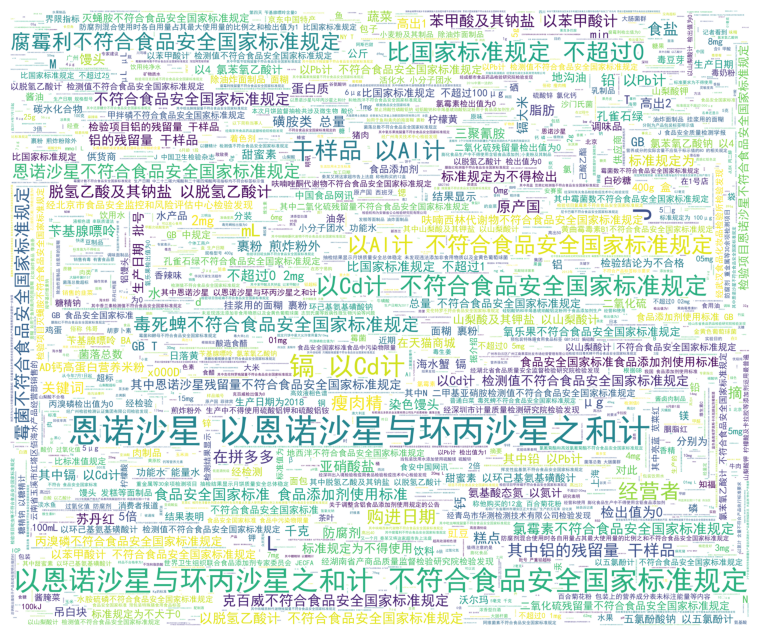

In [26]:
%run draw_wordcloud.py

long_string = ','.join(list(df_sentences['Content'].values))# Create a WordCloud object
stpwrdlst.append('网站')
stpwrdlst.append('原标题')
stpwrdlst.append('近日')
stpwrdlst.append('kg')
stpwrdlst.append('日前')
stpwrdlst.append('g')
stpwrdlst.append('100g')
stpwrdlst.append('mg')
stpwrdlst.append('CFU')
stpwrdlst.append('4倍')
stpwrdlst.append('不等于')
stpwrdlst.append('爱丽丝')
stpwrdlst.append('销售的')
stpwrdlst.append('在淘宝网')
stpwrdlst.append('在天猫')
stpwrdlst.append('在京东商城')
stpwrdlst.append('网店')
stpwrdlst.append('拼多多')
stpwrdlst.append('手机APP')

draw_wordcloud(long_string, stpwrdlst, savefile = 'wc_' + SEG_FLAVOR + '.png')

# 更新关联强度 Update Strength

方法1：使用ASP.Net MVC:  
[`\Association\Update`] 对结果进行清洗，生成 `20200607_115636_selected.csv（FoodSafetyAssociations.csv）`，然后通过[`\Association\Import`] 导入/更新AssociationSet数据库表

方法2：使用python： 

In [27]:
dict_link.update(dic_extracted_links)

In [28]:
dict_link # [list(dict_link.keys())[1] ], list(dict_link.keys())[1]

{('红糖发糕', '脱氢乙酸'): 2,
 ('茂谷柑', '克百威'): 1,
 ('黄鱼', '恩诺沙星'): 1,
 ('杨梅', '甜蜜素'): 25,
 ('泥鳅', '恩诺沙星'): 1,
 ('生姜', '噻虫胺'): 1,
 ('杨梅', '糖精钠'): 17,
 ('桑葚', '脱氢乙酸'): 3,
 ('牛蛙', '恩诺沙星'): 1,
 ('牛蛙', '环丙沙星'): 1,
 ('韭菜', '镉'): 1,
 ('黄鱼', '环丙沙星'): 1,
 ('大黄鱼', '恩诺沙星'): 1,
 ('大黄鱼', '环丙沙星'): 1,
 ('红薯宽粉', '铝'): 2,
 ('海苔饼', '铝'): 12,
 ('鲫鱼', '恩诺沙星'): 1,
 ('鲫鱼', '环丙沙星'): 1,
 ('本地韭菜', '镉'): 2,
 ('鳊鱼', '恩诺沙星'): 1,
 ('鳊鱼', '环丙沙星'): 226,
 ('红薯粉条', '铝'): 1,
 ('绿豆糕', '脱氢乙酸'): 1,
 ('榨菜', '苯甲酸'): 1,
 ('中梅', '甜蜜素'): 2,
 ('油条', '铝'): 1,
 ('豇豆', '甲氨基阿维菌素苯甲酸盐'): 1,
 ('豇豆', '苯甲酸'): 45,
 ('豇豆', '阿维菌素'): 1,
 ('豇豆', '三唑磷'): 27,
 ('猪肉', '土霉素'): 2,
 ('豇豆', '灭蝇胺'): 1,
 ('青菜', '毒死蜱'): 1,
 ('泥鳅', '环丙沙星'): 1,
 ('豇豆', '倍硫磷'): 1,
 ('芒果', '吡唑醚菌酯'): 36,
 ('发糕', '山梨酸'): 1,
 ('粽叶', '铜'): 5,
 ('猪头肉', '山梨酸'): 3,
 ('乌鸡', '甲氧苄啶'): 1,
 ('盐焗味蛋', '山梨酸'): 1,
 ('冰鲜黄鱼', '恩诺沙星'): 1,
 ('冰鲜黄鱼', '环丙沙星'): 1,
 ('竹盐', '氯化钠'): 3,
 ('黄鳝', '恩诺沙星'): 1,
 ('豇豆', '氟'): 14,
 ('豇豆', '甲基异柳磷'): 1,
 ('麻花', '铝'): 11,
 ('牛蛙', '呋喃唑酮'): 1,
 ('二锅头', '邻苯二甲酸二正丁酯'): 2

In [50]:
df_links = pd.DataFrame(columns = ['Entity1', 'Entity2', 'Strength'])

combined_v = 0
for k,v in dict_link.items():
    
    if k[1] in ['氟','铜']:
        continue
    
    k0, k1 = k
    if k[0]  == '长豇豆':
        k0 = '豇豆' # 合并
    if k0 == '豇豆' and (k1 == '苯甲酸' or k1 == '阿维菌素'):
        k1 = '甲氨基阿维菌素苯甲酸盐' # 消歧义
    
    if k0 == '豇豆' and k1 == '甲氨基阿维菌素苯甲酸盐':
        combined_v += v
        continue
    
    df_links.loc[-1] = [k0, k1, v] # add a row
    df_links.index = df_links.index + 1
    
df_links.loc[-1] = ['豇豆', '甲氨基阿维菌素苯甲酸盐', combined_v]
df_links.index = df_links.index + 1

# df_links = df_links[~df_links['Entity2'].isin(['氟','铜'])]
df_links.to_csv('Associations_' + SEG_FLAVOR + '.csv', index = False, sep = '\t')

In [51]:
import json

json_s = []

for row in df_links.values:
    item = []
    item.append(row[0])
    item.append(row[1])
    item.append(row[2])
    
    json_s.append(item)

textfile = open("Associations_" + SEG_FLAVOR + ".json", "w")
a = textfile.write(json.dumps(json_s))
textfile.close()

json_s

[['红糖发糕', '脱氢乙酸', 2],
 ['茂谷柑', '克百威', 1],
 ['黄鱼', '恩诺沙星', 1],
 ['杨梅', '甜蜜素', 25],
 ['泥鳅', '恩诺沙星', 1],
 ['生姜', '噻虫胺', 1],
 ['杨梅', '糖精钠', 17],
 ['桑葚', '脱氢乙酸', 3],
 ['牛蛙', '恩诺沙星', 1],
 ['牛蛙', '环丙沙星', 1],
 ['韭菜', '镉', 1],
 ['黄鱼', '环丙沙星', 1],
 ['大黄鱼', '恩诺沙星', 1],
 ['大黄鱼', '环丙沙星', 1],
 ['红薯宽粉', '铝', 2],
 ['海苔饼', '铝', 12],
 ['鲫鱼', '恩诺沙星', 1],
 ['鲫鱼', '环丙沙星', 1],
 ['本地韭菜', '镉', 2],
 ['鳊鱼', '恩诺沙星', 1],
 ['鳊鱼', '环丙沙星', 226],
 ['红薯粉条', '铝', 1],
 ['绿豆糕', '脱氢乙酸', 1],
 ['榨菜', '苯甲酸', 1],
 ['中梅', '甜蜜素', 2],
 ['油条', '铝', 1],
 ['豇豆', '三唑磷', 27],
 ['猪肉', '土霉素', 2],
 ['豇豆', '灭蝇胺', 1],
 ['青菜', '毒死蜱', 1],
 ['泥鳅', '环丙沙星', 1],
 ['豇豆', '倍硫磷', 1],
 ['芒果', '吡唑醚菌酯', 36],
 ['发糕', '山梨酸', 1],
 ['猪头肉', '山梨酸', 3],
 ['乌鸡', '甲氧苄啶', 1],
 ['盐焗味蛋', '山梨酸', 1],
 ['冰鲜黄鱼', '恩诺沙星', 1],
 ['冰鲜黄鱼', '环丙沙星', 1],
 ['竹盐', '氯化钠', 3],
 ['黄鳝', '恩诺沙星', 1],
 ['豇豆', '甲基异柳磷', 1],
 ['麻花', '铝', 11],
 ['牛蛙', '呋喃唑酮', 1],
 ['二锅头', '邻苯二甲酸二正丁酯', 2],
 ['南园烧鸡', '金黄色葡萄球菌', 1],
 ['桑椹', '脱氢乙酸', 1],
 ['高粱特曲', '邻苯二甲酸二正丁酯', 2],
 ['腌茭头', '苯甲酸', 1],
 ['芒果', 

# 力导向图可视化

或由 [`\Association\Export`] 导出 Associations.json和 Associations.csv

In [52]:
import json
filename = 'Associations_' + SEG_FLAVOR + '.csv'

# Reload back
import pandas as pd

df_assoc = pd.read_csv(filename, delimiter='\t')  
df_assoc.head()

,Entity1,Entity2,Strength
0,红糖发糕,脱氢乙酸,2
1,茂谷柑,克百威,1
2,黄鱼,恩诺沙星,1
3,杨梅,甜蜜素,25
4,泥鳅,恩诺沙星,1


226 1.5303388494877856 1


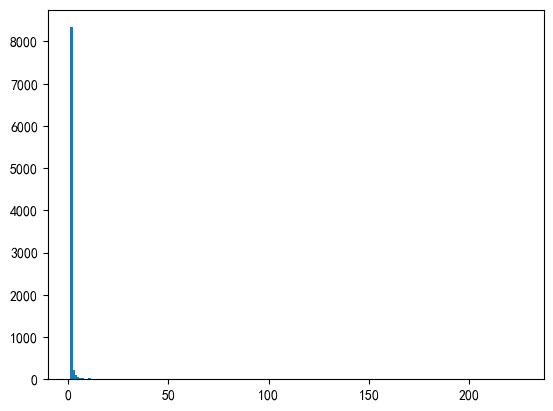

In [53]:
import matplotlib.pyplot as plt

l = df_assoc['Strength'].values
print(l.max(), l.mean(), l.min()) # K-S Poisson dist p = 0 
_ = plt.hist(l, bins = 200)

In [54]:
df_assoc.sort_values(by='Strength', ascending = False).head(50)

,Entity1,Entity2,Strength
20,鳊鱼,环丙沙星,226
113,黄鳝,环丙沙星,151
279,年糕,脱氢乙酸,138
8882,豇豆,甲氨基阿维菌素苯甲酸盐,134
511,即食海蜇,铝,93
337,沼虾,恩诺沙星,87
490,红糖馒头,甜蜜素,82
298,香蕉,噻虫胺,80
104,河虾,恩诺沙星,76
90,老姜,噻虫胺,73


前10位分析：


恩诺沙星(enrofloxacin, ENR)是第三代喹诺酮类抗菌药物，也是第一个动物专用的抗生素[1]。因其对大多数革兰氏阴性菌、革兰氏阳性菌等均有抑制作用，且具有毒副作用小、抗菌力强、体内分布广等特点，《渔药使用规范》(SC/T 1132—2016)将其列为水产养殖用处方药之一[2]，并广泛应用于水产养殖病害防控中[3]。ENR在动物体内会发生脱乙基反应，生成具有活性的代谢产物环丙沙星(ciprofloxacin, CIP)。CIP药理作用类似ENR，因CIP存在明显种属差异，容易产生耐药性且毒副作用强，《无公害食品渔用药物使用准则》(NY 5071—2002)已将其列为禁用渔药。《食品安全国家标准食品中兽药最大残留限量》(GB31650—2019)将水产动物中ENR及其代谢产物CIP的总残留限量定为100 μg/kg[4]。

恩诺沙星是一类人工合成的广谱抗菌药，可用于治疗动物的皮肤感染、呼吸道感染等，是动物专属用药。人若长期食用恩诺沙星超标的食品，可能导致恩诺沙星在体内蓄积，进而对人体机能产生危害，还有可能使人体产生耐药性，影响软骨发育，导致畸形。多年来，我国各地市场监管部门在开展各类食品的抽检工作中，在淡水鱼中检出恩诺沙星超标的问题时有发生。

脱氢乙酸钠属广谱类防腐剂，安全性和稳定性高，抑制酵母菌、霉菌和细菌的繁殖作用极强，常用于奶油、汤料、面包、月饼、糕点等食品制作领域。一般在食品加工过程中不会分解和蒸发，食用后也不会在体内残留，可随着新陈代谢降解为乙酸。我国规定脱氢乙酸钠在腌渍蔬菜和淀粉制品中限量是1.0g/kg，黄油、糕点、肉制品等其他几类产品中规定的添加量不得超过0.3-0.5g/kg，按国家规定的剂量之内使用一般不会对身体造成伤害。但如果使用不当或超量使用，可能会出现一些皮肤反应，容易导致皮肤出现瘙痒的症状，常见于皮疹，有时甚至会出现皮肤过敏现象，严重时皮肤可能还会出现烧灼感。但是从2021年年开始，根据2021年3月国家食品安全国家标准评审委员会发布的《食品添加剂使用标准》修订版征求意见稿，淀粉制品、面包、糕点、烘烤食品馅料及表面用挂浆、黄油和浓缩黄油、预制肉制品、熟肉制品、果蔬汁等产品中，都将禁用脱氢乙酸及其钠盐作为防腐剂，意味着这一陪伴中国食品行业20余年的防腐剂或将告别历史舞台。

甲维盐全称为甲氨基阿维菌素苯甲酸盐，于 1984 年由美国默克公司研发，是一种超高效、低毒、广谱、低残留、无公害的绿色生物杀虫剂，其活性显著高于母体阿维菌素。甲维盐广泛用于蔬菜、果树、棉花等农作物上的多种害虫的防治上。  
甲氨基阿维菌素苯甲酸盐是一种大环内酯类杀虫剂，具有触杀、胃毒和组织渗透作用，对豇豆中蓟马、豆荚螟等有较好防效。少量的残留不会引起人体急性中毒，但长期食用甲氨基阿维菌素苯甲酸盐超标的食品，对人体健康可能有一定影响。《食品安全国家标准食品中农药最大残留限量》（GB 2763—2021）中规定，甲氨基阿维菌素苯甲酸盐在豆类蔬菜（菜豆、菜用大豆除外）中的最大残留限量值为0.015mg/kg，在普通白菜中的最大残留限量值为0.1mg/kg。豇豆和油菜（普通白菜）中甲氨基阿维菌素苯甲酸盐残留量超标的原因，可能是为快速控制虫害，加大用药量或未遵守采摘间隔期规定，致使上市销售的产品中残留量超标。

海蜇加工是我国传统的加工产业，新鲜海蜇需经多次盐矾处理脱水去毒制成盐渍海蜇，从而引起了产品中高浓度的铝残留。铝残留会对人体肾脏、神经系统等产生负面影响[11]。

甜蜜素，化学名称为环己烷氨基磺酸钠，是一种有机化合物，化学式为C6H12NNaO3S，是一种常用的甜味剂，甜度是蔗糖的30～40倍 [1]  。1969年因用糖精-环己烷氨基磺酸钠喂养的白鼠发现患有膀胱癌，故1970年美国、日本相继禁止使用。在随后的继续研究中，没有发现本品有致癌作用 [2]  。人口服环己烷氨基磺酸钠，40%由尿排出，60%由粪便排出，无蓄积现象。我国《食品添加剂使用卫生标准》（GB 2760-2014）对食品加工中甜蜜素用量进行了严格限制。2017年10月27日，世界卫生组织国际癌症研究机构公布的致癌物清单初步整理参考，环己烷氨基磺酸钠在3类致癌物清单中。 [5] 


噻虫胺是一种有机化合物，分子式是C6H8ClN5O2S。噻虫胺是新烟碱类中的一种杀虫剂，是一类高效安全、高选择性的新型杀虫剂，其作用与烟碱乙酰胆碱受体类似，具有触杀、胃毒和内吸活性。主要用于水稻、蔬菜、果树及其他作物上防治蚜虫、叶蝉、蓟马、飞虱等半翅目、鞘翅目、双翅目和某些鳞翅目类害虫的杀虫剂，具有高效、广谱、用量少、毒性低、药效持效期长、对作物无药害、使用安全、与常规农药无交互抗性等优点。相关标准规定了其最大残留限量。

The visualization effect is not good. Use the js library. Paste the content of `Associations.json` to    

`/V/Force?min_support=2`